# Midterm - Coleman Barkley

## Import Libraries and Data

In [19]:
# Import Libraries
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from keras.utils import to_categorical

In [2]:
# Set random seed 
random_seed = 10
np.random.seed(random_seed)

In [3]:
# Load Data
file = 'pima_diabetes.csv'

# Column Names
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(file, names=col_names)

## EDA

In [4]:
# Missing Values?
print(df.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [5]:
# Dataframe Shape
print(df.shape)

(768, 9)


In [6]:
# Columns Types
print(df.dtypes)

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [7]:
# Dataset sample
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Summary statistics
df.describe(include=None)

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# How many in each class?
print(df.groupby('class').size())

class
0    500
1    268
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f904ec69b70>,
      dtype=object)

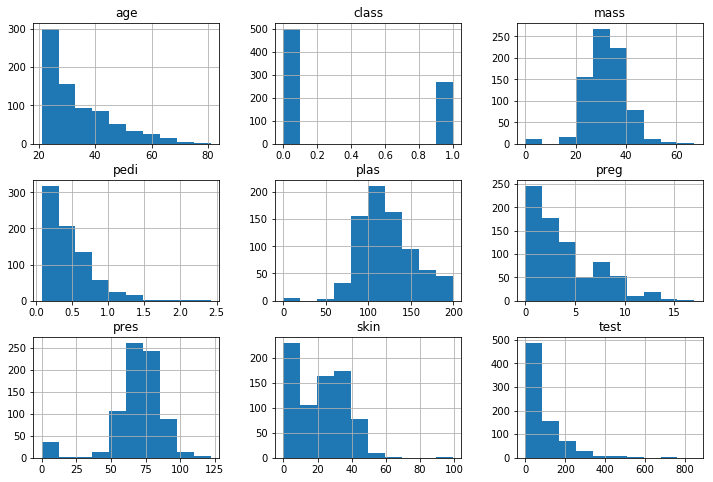

In [10]:
# Print Histrograms
df.hist(figsize=(12, 8))

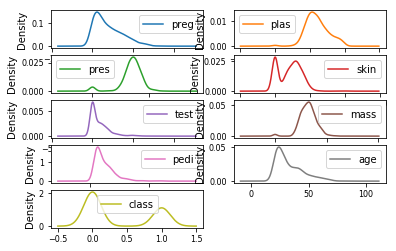

In [11]:
# Print Density Plots
df.plot(kind='density', subplots=True, layout=(5, 2), sharex=False, legend=True, fontsize= 8)
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f904c785cf8>,
      dtype=object)

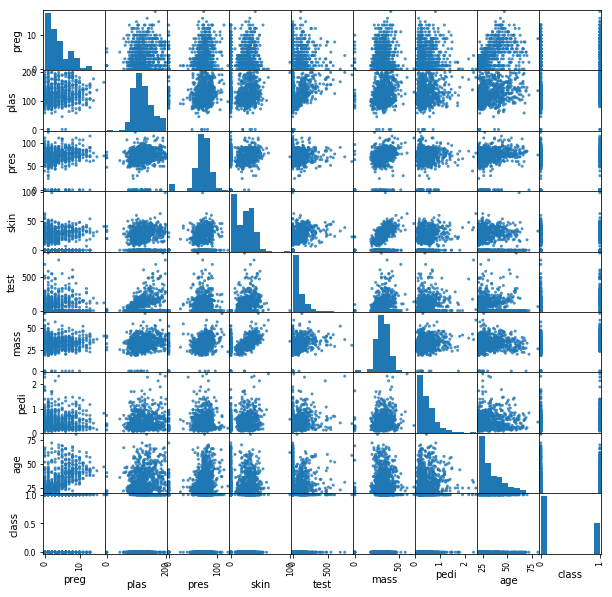

In [12]:
# Print Scatter Plot Matrix
scatter_matrix(df, alpha=0.8, figsize=(10, 10))

## Split into Training and Test

In [24]:
# Storing values in Numpy Array
arr = df.values

X = arr[:, 0:8]
Y = arr[:,  8]

In [25]:
# Split data
test_size = 0.33

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_seed)

In [26]:
# Convert the Y columns to categorical values
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

## Build Neural Network

# 8 Inputs, a Hidden Layer with 4 Nodes, a Second Hidden Layer with 4 Nodes and 2 Outputs

In [35]:
# Prepare the model

def baseline_model():
    model = Sequential()
    model.add(Dense(4, input_dim=8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [36]:
# Create the model
model = baseline_model()

In [37]:
model.fit(X_train, Y_train, epochs=150, batch_size=10)

Epoch 1/150
514/514 [==============================] - 1s 1ms/step - loss: 11.0250 - accuracy: 0.3891
Epoch 2/150
514/514 [==============================] - 0s 213us/step - loss: 3.7632 - accuracy: 0.5409
Epoch 3/150
514/514 [==============================] - 0s 207us/step - loss: 1.9804 - accuracy: 0.5467
Epoch 4/150
514/514 [==============================] - 0s 215us/step - loss: 1.0873 - accuracy: 0.5661
Epoch 5/150
514/514 [==============================] - 0s 212us/step - loss: 0.8192 - accuracy: 0.5953
Epoch 6/150
514/514 [==============================] - 0s 203us/step - loss: 0.7112 - accuracy: 0.6245
Epoch 7/150
514/514 [==============================] - 0s 211us/step - loss: 0.6777 - accuracy: 0.6265
Epoch 8/150
514/514 [==============================] - 0s 215us/step - loss: 0.6690 - accuracy: 0.6479
Epoch 9/150
514/514 [==============================] - 0s 212us/step - loss: 0.6603 - accuracy: 0.6420
Epoch 10/150
514/514 [==============================] - 0s 218us/step - lo

In [38]:
evaluator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5)

In [39]:
kfold = KFold(n_splits=10, shuffle=True, random_state=random_seed)

In [40]:
results = cross_val_score(evaluator, X_test, Y_test, cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200
228/228 [==============================] - 1s 3ms/step - loss: 3.2373 - accuracy: 0.5746
Epoch 2/200
228/228 [==============================] - 0s 410us/step - loss: 2.4460 - accuracy: 0.5395
Epoch 3/200
228/228 [==============================] - 0s 407us/step - loss: 1.9139 - accuracy: 0.5877
Epoch 4/200
228/228 [==============================] - 0s 406us/step - loss: 1.2730 - accuracy: 0.6140
Epoch 5/200
228/228 [==============================] - 0s 399us/step - loss: 0.8197 - accuracy: 0.6404
Epoch 6/200
228/228 [==============================] - 0s 411us/step - loss: 0.7444 - accuracy: 0.6535
Epoch 7/200
228/228 [==============================] - 0s 417us/step - loss: 0.7151 - accuracy: 0.6535
Epoch 8/200
228/228 [==============================] - 0s 414us/step - loss: 0.6969 - accuracy: 0.6491
Epoch 9/200
228/228 [==============================] - 0s 422us/step - loss: 0.6807 - accuracy: 0.6535
Epoch 10/200
228/228 [==============================] - 0s 415us/step - los

In [41]:
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

254/254 [==============================] - 0s 1ms/step

accuracy: 67.72%
